Implementing Feedforward neural networks with Keras and TensorFlow 
a. Import the necessary packages 
b. Load the training and testing data (MNIST/CIFAR10) 
c. Define the network architecture using Keras 
d. Train the model using SGD 
e. Evaluate the network 
f. Plot the training loss and accuracy

In [1]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

2023-11-01 10:37:58.679143: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 10:37:58.884191: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 10:37:58.885764: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 10:38:00.104552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [4]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

2023-11-01 10:38:36.302883: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10


2023-11-01 10:38:54.019379: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


463/469 [============================>.] - ETA: 0s - loss: 2.2948 - accuracy: 0.1522

2023-11-01 10:38:55.865906: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 3ms/step - loss: 2.2944 - accuracy: 0.1529 - val_loss: 2.2615 - val_accuracy: 0.2017
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2383 - accuracy: 0.3169 - val_loss: 2.2105 - val_accuracy: 0.4460
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.1807 - accuracy: 0.4682 - val_loss: 2.1430 - val_accuracy: 0.4615
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 2.1007 - accuracy: 0.5301 - val_loss: 2.0453 - val_accuracy: 0.5668
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.9866 - accuracy: 0.5763 - val_loss: 1.9091 - val_accuracy: 0.6013
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.8334 - accuracy: 0.6073 - val_loss: 1.7364 - val_accuracy: 0.6392
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 1.6530 - accuracy: 0.6439 - val_loss: 1.5481 - val_accuracy: 0.6716
Epoch 8/10
469/46

In [6]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

58/79 [=====================>........] - ETA: 0s

2023-11-01 10:39:21.730559: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       980
           1       0.76      0.99      0.86      1135
           2       0.84      0.72      0.77      1032
           3       0.63      0.86      0.73      1010
           4       0.71      0.68      0.69       982
           5       0.80      0.39      0.52       892
           6       0.81      0.89      0.85       958
           7       0.80      0.88      0.84      1028
           8       0.85      0.50      0.63       974
           9       0.67      0.63      0.65      1009

    accuracy                           0.76     10000
   macro avg       0.77      0.75      0.74     10000
weighted avg       0.77      0.76      0.75     10000



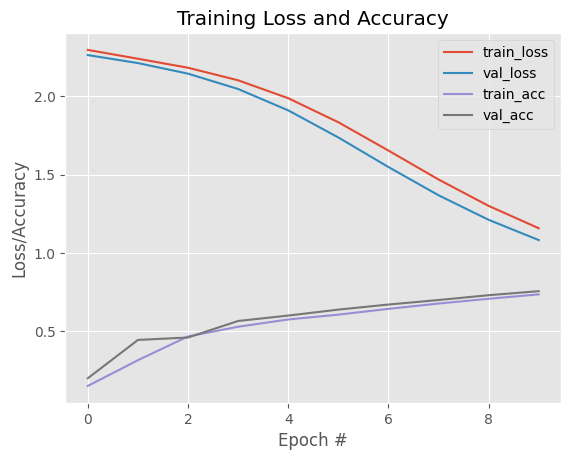

In [7]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()